In [46]:
import pandas as pd
from ord_data_load import ORD_PATH
from chem_render import draw_reaction
from rdkit.Chem.AllChem import ReactionFromSmarts
from rdkit.Chem.rdChemReactions import HasReactionSubstructMatch
from rdkit.Chem import SanitizeMol

#to disable warnings
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
pd_df = pd.read_pickle(f'{ORD_PATH}/pd_df.pkl')

True


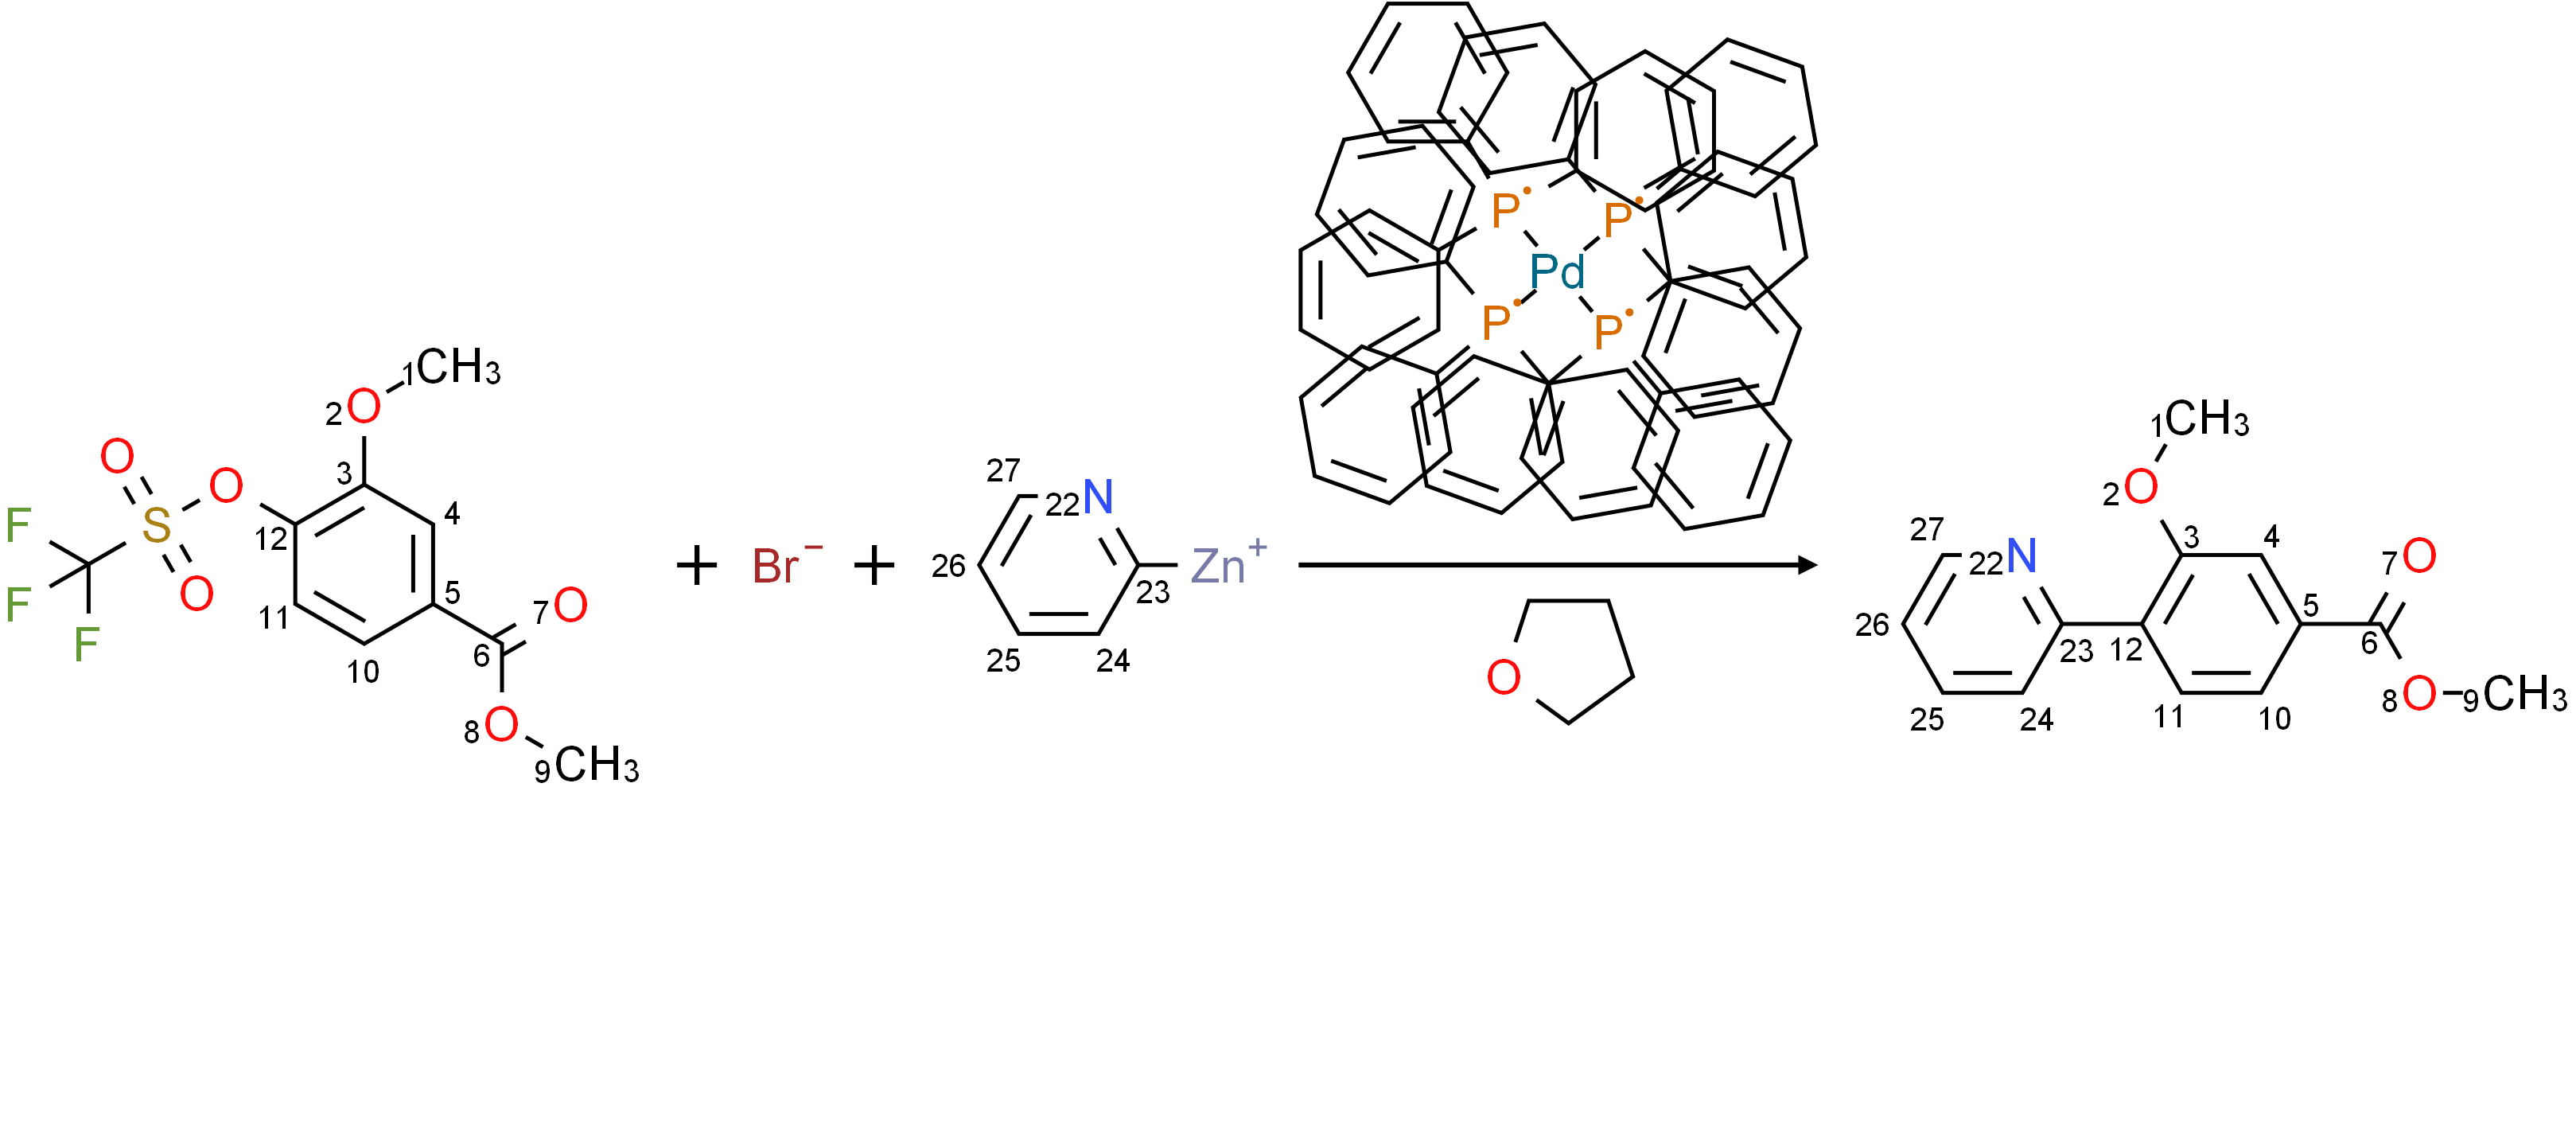

Patent:       US07087601B2
Reaction_id:  ord-ba8606b425c74166b50320df786dbb82
To 300 mL of degassed THF was added methyl 3-methoxy-4-{[(trifluoromethyl)sulfonyl]oxy}benzoate (20.95 g, 66.7 mmol), 2-pyridylzinc bromide (200 mL of 0.5M solution in THF, 100 mmol), and tetrakis(triphenylphosphine)palladium(0) (5.00 g, 4.3 mmol). The mixture was degassed with argon for an additional 30 minutes and heated at reflux under an argon atmosphere overnight. The reaction mixture was cooled to rt and concentrated in vacuo. The resultant brown residue was partitioned between EtOAc (1500 mL) and 50% saturated NaHCO3 (1000 mL). The aqueous layer was extracted with EtOAc (500 mL), and the combined organic layers washed with brine, dried over MgSO4, filtered, and concentrated in vacuo. The crude product was purified by column chromatography (0–25% EtOAc/hexanes) to give methyl 3-methoxy-4-pyridin-2-ylbenzoate as a colorless solid. 1H NMR (DMSO-d6, 300 MHz) δ 8.70 (d, 1H), 7.92–7.83 (m, 3H), 7.70–7.65 (m,

In [56]:
SUZUKI_PATTERN = "[B]-[C,c:1].[C,c:2]-[Cl,Br,I,O]>>[C,c:1]-[C,c:2]"

query_suzuki = ReactionFromSmarts(SUZUKI_PATTERN)

def rdkit_rxn_match(rxn_smile: str, query_rxn=None) -> bool:
    if rxn_smile:
        rxn = ReactionFromSmarts(rxn_smile)
        try:
            for r in rxn.GetReactants(): SanitizeMol(r)
        except Exception as e:
            pass
        try:
            for p in rxn.GetProducts(): SanitizeMol(p)
        except Exception as e:
            pass
        return HasReactionSubstructMatch(rxn, query_rxn)
    return False

print(rdkit_rxn_match(pd_df['reaction_smile'].iloc[1000], query_suzuki))
draw_reaction(pd_df.iloc[1000])

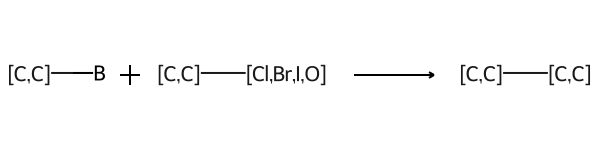

In [48]:
query_suzuki

In [49]:
%%time
suzuki_rdkit = pd_df['reaction_smile'].apply(rdkit_rxn_match,
                              query_rxn = query_suzuki)

CPU times: total: 1min 59s
Wall time: 1min 59s


In [50]:
suzuki_rdkit.sum()

120612

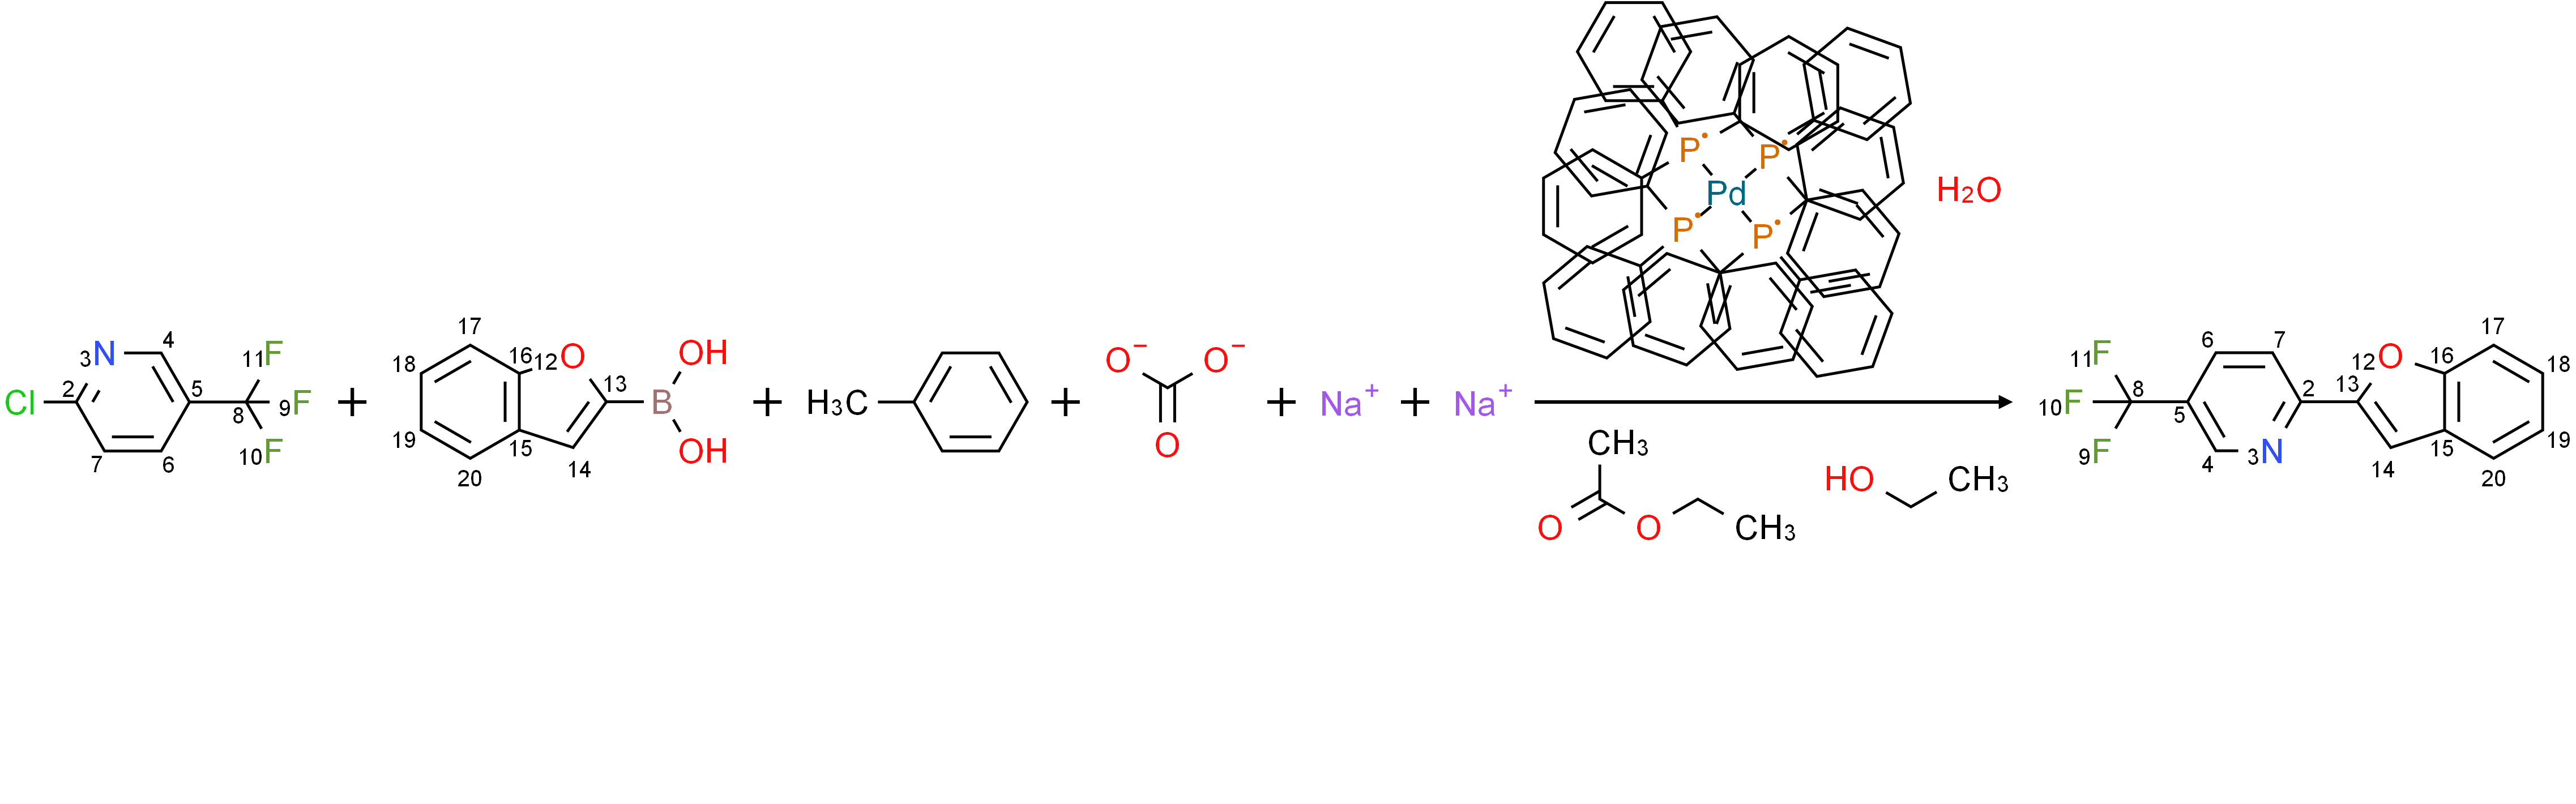

Patent:       US06869694B2
Reaction_id:  ord-b4e18f052c4a4a7d9bdc639c55b5c39d
In a 100 ml-three-necked flask, 2.80 g (15.4 mM) of 2-chloro-5-trifluoromethylpyridine, 2.50 g (15.4 mM) of 2-benzofuranylboronic acid, 14 ml of toluene, 7 ml of ethanol and 14 ml of 2M-sodium carbonate aqueous solution were placed and stirred at room temperature under nitrogen stream, and 0.55 g (0.48 mM) of tetrakis(triphenylphosphine)palladium (0) was added thereto. Thereafter, reflux under stirring for 4 hours was performed under nitrogen stream. After the reaction, the reaction mixture was cooled on an ice bath and stirred at room temperature after addition of ethyl acetate and saturated saline water. The organic layer was washed with water and dried with anhydrous magnesium sulfate, and the solvent was removed under reduced pressure to obtain a residue. The residue was purified by alumina column chromatography (eluent: toluene) and recrystallized from methanol to obtain 0.72 g of 2-(5-trifluoromethylpyr

In [68]:
draw_reaction(pd_df[suzuki_rdkit])

In [ ]:
pd_df['reaction_smile'].str